In [201]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math

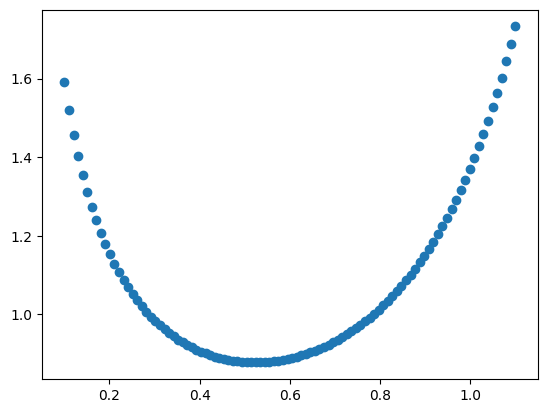

In [202]:
#Derivación punto 8
#c)
def DerivadaProgresiva(f, x, h=0.01):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def RaizTan(x):
    return np.sqrt(np.tan(x))

x_tan = np.linspace(0.1, 1.1, 100) # Se usa 100 por (1.1-0.1)/0.01
dp_tan = DerivadaProgresiva(RaizTan, x_tan)
plt.scatter(x_tan, dp_tan)


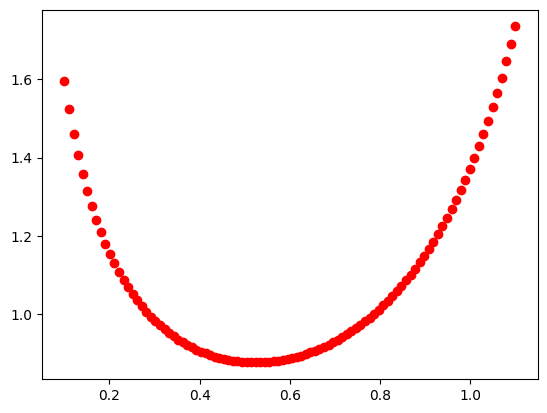

In [203]:
#d)
def DerivadaCentral(f, x, h=0.01):
    return (f(x+h)-f(x-h))/(2*h)
dc_tan = DerivadaCentral(RaizTan, x_tan)
plt.scatter(x_tan, dc_tan, color = "red")

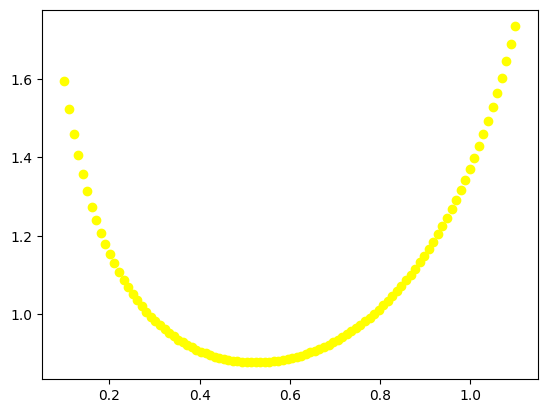

In [204]:
#e)
def DerivadaReal(x=x_tan):
    return 1/(2*RaizTan(x)*(np.cos(x))**2)
plt.scatter(x_tan, DerivadaReal(), color = "yellow")

In [205]:
#f)
ErrorProgresiva = np.abs(dp_tan - DerivadaReal())
ErrorCentral = np.abs(dc_tan - DerivadaReal())


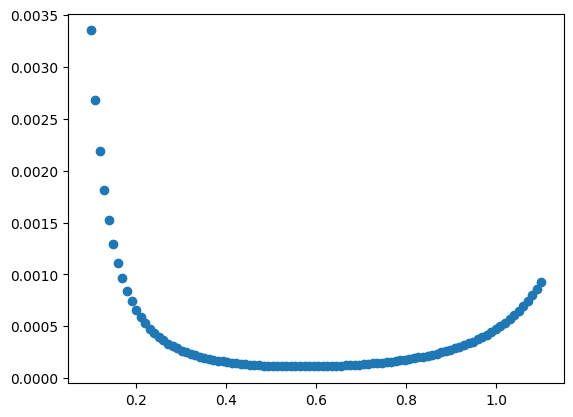

In [206]:
plt.scatter(x_tan, ErrorProgresiva)

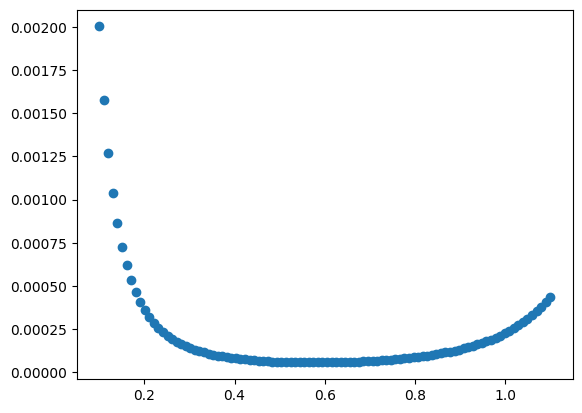

In [207]:
plt.scatter(x_tan, ErrorCentral)

In [208]:
#Tienen el mismo orden de precisión, pero no es igual a h**2 (el orden de este es
#10e-4 y el de la central y progresiva fue de 10e-3) 

In [209]:
#Interpolación punto 3

#Hacemos el proceso de interpolación para comparar el valor interpolado con el real
def FuncionRaiz(x):
    return np.sqrt(x)
Valor_Real = float(FuncionRaiz(114))

x_soporte = np.array([100, 121, 144])
y_soporte = FuncionRaiz(x_soporte)
x = sym.Symbol('x',real=True)

def LagrangePunto(X_soporte, i_soporte, x):
    poli_cardinal=1
    for j in range(len(X_soporte)):
        if i_soporte != j:
            poli_cardinal *= (x-X_soporte[j])/(X_soporte[i_soporte]-X_soporte[j])
    return poli_cardinal

def Interpolacion(X_soporte, Y_soporte):
    poli_interpolacion = 0
    for i in range(len(X_soporte)):
        poli_interpolacion += Y_soporte[i]*LagrangePunto(X_soporte, i, x)
    return poli_interpolacion

Polinomio_Lagrange = Interpolacion(x_soporte, y_soporte)
Valor_Interpolado = Polinomio_Lagrange.subs(x, 114)
#Ahora, calculamos el error de interpolación usando la fórmula de las notas.

#Tenemos n=2 (porque son 3 puntos en el soporte), entonces debemos usar la
#tercera derivada (n+1=3). La cual es la que sigue:
#Escogemos ξ=100, que es el extremo menor del intervalo.

def TerceraDerivadaFuncionRaiz(x):
    return 3/(8*x**(5/2))

def GradoExactitud(df, x_soporte):
    Error = df(100)/math.factorial(2+1)
    for n in range(len(x_soporte)):
        Error *= (114-x_soporte[n])
    return Error

#Imprimimos los resultados
Grado_Exactitud = float(GradoExactitud(TerceraDerivadaFuncionRaiz, x_soporte))
print(f"Valor interpolado: {Valor_Interpolado}\nError calculado: {Grado_Exactitud}\nRaiz real de 114: {Valor_Real}\nDiferencia:{Valor_Real - Valor_Interpolado}")

Valor interpolado: 10.6758893280632
Error calculado: 0.0018375000000000004
Raiz real de 114: 10.677078252031311
Diferencia:0.00118892396807091


In [210]:
#El calculo interpolado de la raíz de 114 dio 10.6758893280632, con un error
#calculado de aprox 1.8*10^-3 (que coincide con la respuesta de la tarea).
#La función real da 10.677078252031311. La diferencia entre ambas fue aprox
#1.19*10^-3, que da el mismo orden de magnitud que lo que indica la formula.

In [211]:
#Interpolación punto 4
#Primero, sacamos los datos de posición del archivo
archivo = open("Datos 4.txt")
archivo.readline()
x_posicion=[]
y_posicion=[]
linea = archivo.readline()
while len(linea) > 0:
    datos = linea.split(",")
    x_posicion.append(float(datos[0]))
    y_posicion.append(float(datos[1]))
    linea = archivo.readline()
archivo.close()

#Ponemos los datos de posición en x y y en arrays para poder manipularlos
X = np.array(x_posicion)
Y = np.array(y_posicion)

#Interpolamos la trayectoria usando la función del punto 3
Trayectoria_Interpolada = Interpolacion(X,Y).expand()

#El coeficiente de x en la ecuación de trayectoria es la tangente, entonces la igualamos con el
#Coeficiente conseguido en la interpolación
tangente_theta = float(Trayectoria_Interpolada.coeff(x))

#Sacamos el arcotangente para hallar el ángulo
theta = np.arctan(tangente_theta)
 
#El coeficiente de x**2 en la ecuación de trayectoria (y en su equivalente interpolada, de igual manera)
#es -g/[(2*(Vi**2)*(cos(theta))**2]. Así que despejamos Vi**2 y sacamos la raíz para hallar su magnitud.
Coeficiente_x2 = float(Trayectoria_Interpolada.coeff(x**2))
Magnitud_Velocidad = np.sqrt(-9.8/(2*Coeficiente_x2*(np.cos(theta))**2))

#Pasamos theta de rads a grados y, junto con la magnitud, lo aproximamos a dos cifras:
theta = np.degrees(theta).round(2)
Magnitud_Velocidad = Magnitud_Velocidad.round(2)

#Mostramos los resultados
print(f"El vector velocidad está dado por {Magnitud_Velocidad} m/s con dirección {theta}°")






El vector velocidad está dado por 10.0 m/s con dirección 20.0°
